<a href="https://colab.research.google.com/github/rochak94/info-mis-6105-finalassignmnet/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract

Heart Disease is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. In the United States alone, heart disease claims roughly 647,000 lives each year — making it the leading cause of death. The buildup of plaques inside larger coronary arteries, molecular changes associated with aging, chronic inflammation, high blood pressure, and diabetes are all causes of and risk factors for heart disease.

The Centers for Disease Control and Prevention has identified high blood pressure, high blood cholesterol, and smoking as three key risk factors for heart disease. Roughly half of Americans have at least one of these three risk factors. The National Heart, Lung, and Blood Institute highlights a wider array of factors such as Age, Environment and Occupation, Family History and Genetics, Lifestyle Habits, Other Medical Conditions, Race or Ethnicity, and Sex for clinicians to use in diagnosing coronary heart disease. Diagnosis tends to be driven by an initial survey of these common risk factors followed by bloodwork and other tests.

Q1 What is the Question

We are trying to prdedict the independent variables that causes a heart attack or builds upto chest pain.

Importing Libraries

In [ ]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm


import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
shap.initjs()



import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm


import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures
import statsmodels.api as sm

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
shap.initjs()

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
from sklearn.metrics import roc_curve , auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
shap.initjs()
import time


random_state=7

In [ ]:
!pip install shap 

     |████████████████████████████████| 564 kB 4.0 MB/s 


Loading the data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rochak94/info-mis-6105-Assignment2/main/heart_disease_health_indicators_BRFSS2015.csv")

EDA


In [ ]:
pd.set_option('display.max_columns', 500)
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There is no null value. So there is no need of imputing or null values in the data

In [ ]:
# numerical fearures 
num_feats = ['BMI	', 'cholesterol', 'GenHlth',	'MentHlth',	'PhysHlth','Age','Education','Income']
# categorical features (binary)
bin_feats = ['HeartDiseaseorAttack',	'HighBP',	'HighChol',	'CholCheck','Smoker',	'Stroke','Diabetes'	,'PhysActivity',	'Fruits','AnyHealthcare',	'NoDocbcCost','Sex']
cat_feats =  bin_feats

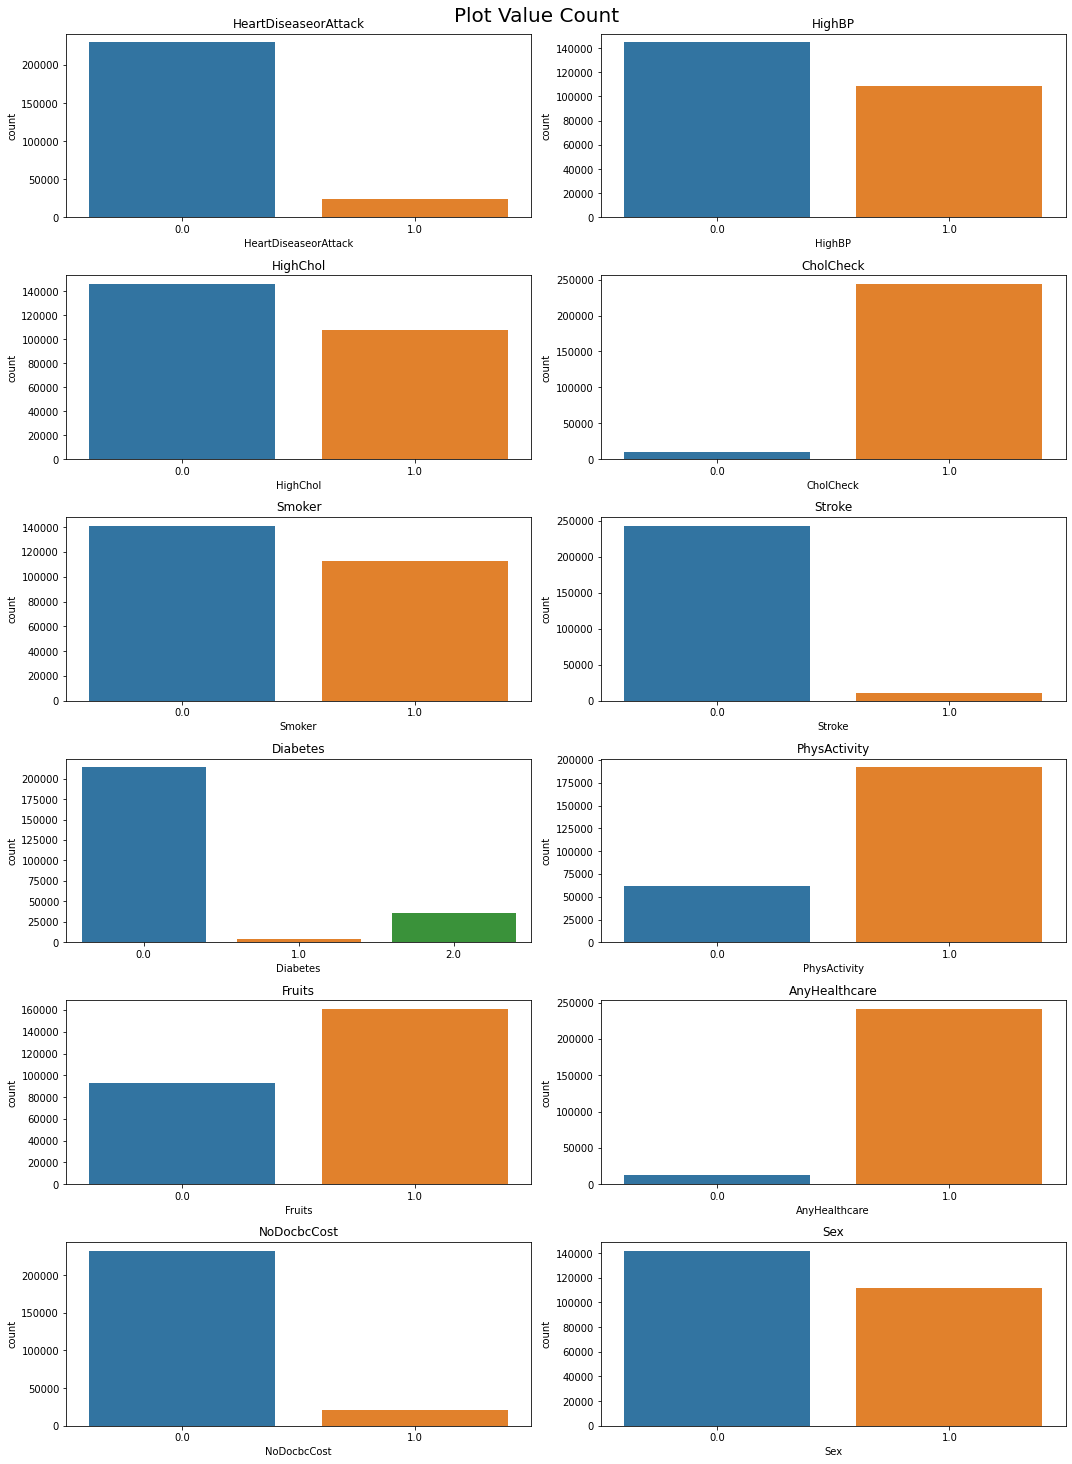

In [ ]:
plt.figure(figsize=(15,40))
for i,column in enumerate(cat_feats):
    plt.subplot(len(cat_feats), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:

plt.figure(figsize=(15,40))
for i,column in enumerate(cat_feats):
    plt.subplot(len(cat_feats), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=data[column].value_counts(), labels=data[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
distcol = ['Age', 'MentHlth', 'PhysHlth', 'BMI']
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0], data=data, x=distcol[0])
sns.histplot(ax=axes[0,1], data=data, x=distcol[1])
sns.histplot(ax=axes[1,0], data=data, x=distcol[2])
sns.histplot(ax=axes[1,1], data=data, x=distcol[3])

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(cat_feats[1:]):
    plt.subplot(len(cat_feats), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column, hue='HeartDiseaseorAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bin_feats[1:]):
    plt.subplot(len(cat_feats), 2, i+1)
    plt.suptitle("Plot Value Count VS Education", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column, hue='Smoker')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(15,50))
for i,column in enumerate(bin_feats[1:]):
    plt.subplot(len(cat_feats), 2, i+1)
    plt.suptitle("Plot Value Count VS Income", fontsize=20, x=0.5, y=1)
    sns.countplot(data=data, x=column, hue='Smoker')
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

The numerical features are highly correlated, especially BMI and GenHlth

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

What did you do ?

Ans: So we are trying the know the best model , so we tried Logistic regression, Random Forest and XGBoost claasifier. We use two models because Logistic regression gives the best acccuracy. Xgb is used to understand the independent variables that are used in the models thorugh the help of shap values.

In [ ]:
#select HeartDiseaseorAttack as target variable:
y = data['HeartDiseaseorAttack']

#select all the other columns minus HeartDiseaseorAttack as the feature variables:
X = data.drop(['HeartDiseaseorAttack'],axis=1)

In [ ]:
#now make the train-test splits
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('Dimensions: \n x_train:{} \n x_test{} \n y_train{} \n y_test{}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

In [ ]:
#create true negative, false positive, false negative, and true positive 
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

In [ ]:
#Setup classifier scorers
scorers = {'Accuracy': 'accuracy', 
           'roc_auc': 'roc_auc', 
           'Sensitivity':'recall', 
           'precision':'precision',
            'tp': make_scorer(tp), 
           'tn': make_scorer(tn),
           'fp': make_scorer(fp), 
           'fn': make_scorer(fn)}  

In [ ]:
#change this name here to change the print name
classifier_name = 'Easy Ensemble'


start_ts=time.time()
#try swapping out the classifier for random forest instead
#clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=3,criterion='entropy', class_weight='balanced', random_state=random_state)   
clf = EasyEnsembleClassifier(n_estimators=10)
scores = cross_validate(clf, X, y, scoring=scorers, cv=5)          

Sensitivity = round(scores['test_tp'].mean() / (scores['test_tp'].mean() + scores['test_fn'].mean()),3)*100   #TP/(TP+FN) also recall
Specificity = round(scores['test_tn'].mean() / (scores['test_tn'].mean() + scores['test_fp'].mean()),3)*100    #TN/(TN+FP)
PPV = round(scores['test_tp'].mean() / (scores['test_tp'].mean() + scores['test_fp'].mean()),3)*100           #PPV = tp/(tp+fp) also precision
NPV = round(scores['test_tn'].mean() / (scores['test_fn'].mean() + scores['test_tn'].mean()),3)*100           #TN(FN+TN)

scores_Acc = scores['test_Accuracy']                                                                                                                                    
print(f"{classifier_name} Acc: %0.2f (+/- %0.2f)" % (scores_Acc.mean(), scores_Acc.std() * 2))                                                                                                    
scores_AUC = scores['test_roc_auc']               
#Only works with binary classes, not multiclass                  
print(f"{classifier_name} AUC: %0.2f (+/- %0.2f)" % (scores_AUC.mean(), scores_AUC.std() * 2))      
scores_sensitivity = scores['test_Sensitivity']                                                                     #Only works with binary classes, not multiclass                  
print(f"{classifier_name} Recall: %0.2f (+/- %0.2f)" % (scores_sensitivity.mean(), scores_sensitivity.std() * 2)) 
scores_precision = scores['test_precision']                                                                     #Only works with binary classes, not multiclass                  
print(f"{classifier_name} Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))                          
print(f"{classifier_name} Sensitivity = ", Sensitivity, "%")
print(f"{classifier_name} Specificity = ", Specificity, "%")
print(f"{classifier_name} PPV = ", PPV, "%")  
print(f"{classifier_name} NPV = ", NPV, "%")

print("CV Runtime:", time.time()-start_ts)

Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]

y = data['HeartDiseaseorAttack']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [ ]:
## Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from statsmodels.tools import add_constant as add_constant
data_constant = add_constant(data)
data_constant.head()

In [ ]:
## Predicting data
y_pred=model.predict(X_test)

In [ ]:
from statsmodels.tools import add_constant as add_constant
data_constant = add_constant(data)
data_constant.head()

,const,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,1.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['HeartDiseaseorAttack'], data[['Smoker', 'Diabetes', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'Sex','Age','BMI']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     HeartDiseaseorAttack   R-squared (uncentered):                   0.193
Model:                              OLS   Adj. R-squared (uncentered):              0.193
Method:                   Least Squares   F-statistic:                              7607.
Date:                  Fri, 06 May 2022   Prob (F-statistic):                        0.00
Time:                          01:51:58   Log-Likelihood:                         -33022.
No. Observations:                253680   AIC:                                  6.606e+04
Df Residuals:                    253672   BIC:                                  6.614e+04
Df Model:                             8                                                  
Covariance Type:              nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Smoker           0.0223      0.001     19.753      0.000       0.020       0.024
Diabetes         0.0447      0.001     54.020      0.000       0.043       0.046
PhysActivity    -0.0361      0.001    -30.346      0.000      -0.038      -0.034
GenHlth          0.0365      0.001     59.328      0.000       0.035       0.038
PhysHlth         0.0024   7.39e-05     32.209      0.000       0.002       0.003
Sex              0.0456      0.001     41.216      0.000       0.043       0.048
Age              0.0116      0.000     70.356      0.000       0.011       0.012
BMI             -0.0039   6.23e-05    -63.123      0.000      -0.004      -0.004
==============================================================================
Omnibus:                   116344.321   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           470217.952
Skew:                           2.366   Prob(JB):                         0.00
Kurtosis:                       7.700   Cond. No.                         69.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

## classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     22925
         1.0       0.50      0.08      0.14      2443

    accuracy                           0.90     25368
   macro avg       0.71      0.54      0.54     25368
weighted avg       0.87      0.90      0.87     25368



Confusion matrix is 
 [[22730   195]
 [ 2246   197]]


Text(42.0, 0.5, 'predicted label')

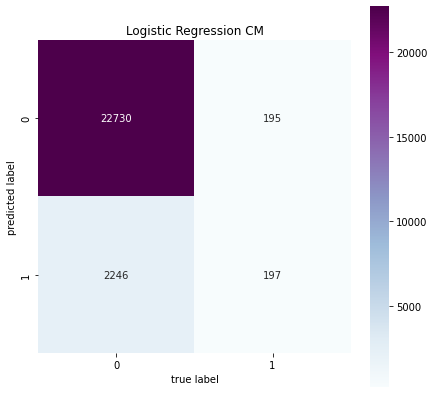

In [ ]:
## confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix is \n",conf_mat)

## plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(conf_mat, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:

## accuracy score
print("accuracy score : ",accuracy_score(y_test,y_pred))

## percentage accurate
print("accuracy:", round(100*accuracy_score(y_test,y_pred)),"%")

accuracy score :  0.9037764112267423
accuracy: 90 %


NameError: ignored

- **All attributes selected almost after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.**

- **Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.**

For XGB Classfier

In [ ]:
#assign target variable and features
y = data['HeartDiseaseorAttack']
X = data.drop('HeartDiseaseorAttack', axis=1)


In [ ]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X,y)

In [ ]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

One the fundemental properties of Shapley values is that they always sum up to the difference between the prediction outcome when all factors are present and the predictation outcome when no symtoms are present. For machine learning models this means that SHAP values of all the input features will always sum up to the difference between baseline (expected) model output and the current model output for the prediction being explained. The easiest way to see this is through a waterfall plot

In [ ]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns))

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

#SHAP scatter plots
shap.plots.scatter(shap_values[:,"Age"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"BMI"],ax=ax[1])


In [ ]:
shap.plots.scatter(shap_values[:,"Smoker"])
shap.plots.scatter(shap_values[:,"GenHlth"])

How well did it work?
 
 As we can see that out of all the these models the logictic regression gives the best accuracy but only accuracy is not the paramter to judge wether there is correlation between and independent variables. P-values to show the correlation.

What did we learn ?

The data is not accurate to predict the heart disease or chest pain suffered by a person as there is too much correlation bwtween the independent variables.